In [779]:
import pandas as pd
import numpy as nm

#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [780]:
df = pd.read_csv(r'trainset_new1.csv')
df.shape

(15446, 2)

In [781]:
df

,text,class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
15441,abc s good morning america ranks it the NUMBE...,1
15442,hyperlink hyperlink hyperlink let mortgage le...,1
15443,thank you for shopping with us gifts for all ...,1
15444,the famous ebay marketing e course learn to s...,1


In [782]:
df.shape

(15446, 2)

### Word Count

In [783]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,Supply Quality China's EXCLUSIVE dimensions at...,171
1,over. SidLet me know. Thx.,5
2,"Dear Friend,Greetings to you.I wish to accost ...",399
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,611
4,Not a surprising assessment from Embassy.,6


In [784]:
df.word_count.describe()

count    15446.000000
mean       195.120161
std        322.482035
min          1.000000
25%         14.000000
50%         75.000000
75%        310.000000
max       6142.000000
Name: word_count, dtype: float64

# DATA PRE-PROCESSING

In [785]:
import re
import nltk 
import string

from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
porter_stemmer = PorterStemmer()

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words=stopwords.words("english")

### Removing duplicates

In [786]:
df=df.drop_duplicates(keep='first')

In [787]:
df.shape

(13566, 3)

### Removing NaN

In [788]:
df.isnull().sum()

text           3
class         52
word_count     0
dtype: int64

In [789]:
df=df.dropna(axis=0,how='any')

In [790]:
df.shape

(13512, 3)

In [791]:
df['class']

0        1
1        0
2        1
3        1
4        0
        ..
15441    1
15442    1
15443    1
15444    1
15445    1
Name: class, Length: 13512, dtype: object

In [792]:
df['class']=pd.to_numeric( df['class'], errors='coerce')

In [793]:
df['class'].isnull().sum()

6

In [794]:
df=df.dropna(axis=0,how='any')

In [795]:
df.shape

(13506, 3)

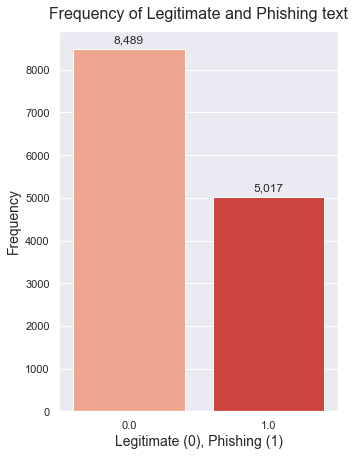

In [796]:
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=df['class'], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing text', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

# Feature extraction

In [797]:
df['text'][1]

'over. SidLet me know. Thx.'

In [798]:
df['length'] = pd.Series()

In [799]:
def body_noWords(body_content):
    body_noWords = len(body_content.split())
    return body_noWords

In [800]:
df['length'] = df['text'].apply(body_noWords)

In [801]:
df['length']

0        171
1          5
2        398
3        608
4          6
        ... 
15441     96
15442     79
15443    154
15444    747
15445    437
Name: length, Length: 13506, dtype: int64

<AxesSubplot:xlabel='length', ylabel='class'>

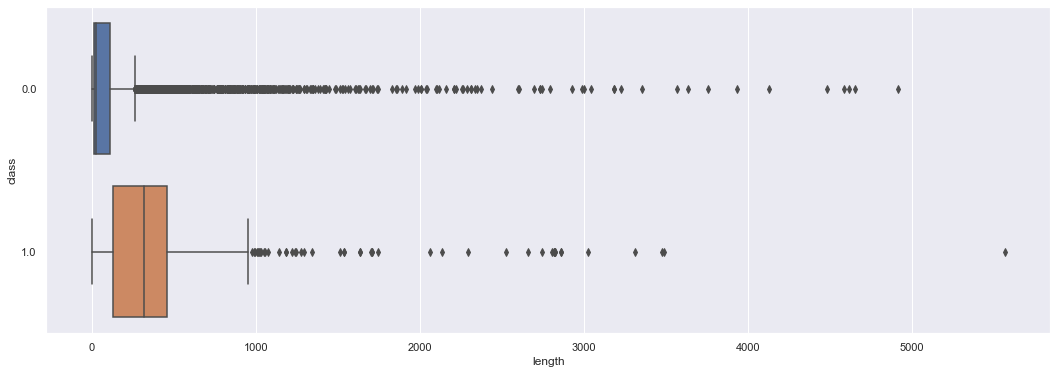

In [802]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "length", y = "class", data = df, orient = "h")


In [803]:
from collections import Counter


def body_noDistinctWords(body_content):
    body_noDistinctWords = len(Counter(body_content.split()))
    return body_noDistinctWords

In [804]:
df['noDistinctWords'] = pd.Series()
df['noDistinctWords'] = df['text'].apply(body_noDistinctWords)
df['noDistinctWords']

0        111
1          5
2        213
3        313
4          6
        ... 
15441     73
15442     59
15443     88
15444    272
15445    220
Name: noDistinctWords, Length: 13506, dtype: int64

<AxesSubplot:xlabel='noDistinctWords', ylabel='class'>

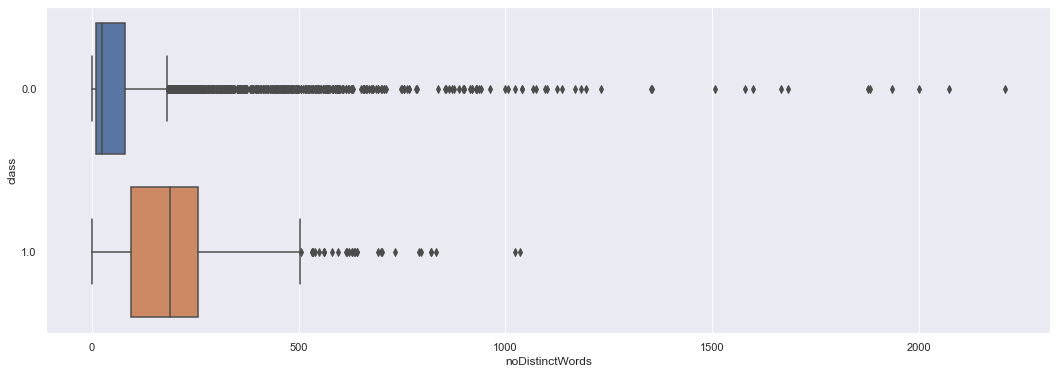

In [805]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "noDistinctWords", y = "class", data = df, orient = "h")

In [806]:
def body_noFunctionWords(body_content):
    body_noFunctionWords = 0
    wordlist = re.sub("[^A-Za-z]", " ", body_content.strip()).lower().split()
    function_words = ["account", "access", "bank", "credit", "click", "identity", "inconvenience", "information", "limited", 
                      "log", "otp", "password", "recently", "risk", "social", "security", "service", "suspended","provide",
                     "verify","details"]
    
    for word in function_words:
        body_noFunctionWords += wordlist.count(word)
    return body_noFunctionWords


In [807]:
df['nofunctionWords'] = pd.Series()
df['nofunctionWords'] = df['text'].apply(body_noFunctionWords)
df['nofunctionWords']

0         0
1         0
2         2
3        14
4         0
         ..
15441     1
15442     1
15443     3
15444     7
15445     2
Name: nofunctionWords, Length: 13506, dtype: int64

<AxesSubplot:xlabel='nofunctionWords', ylabel='class'>

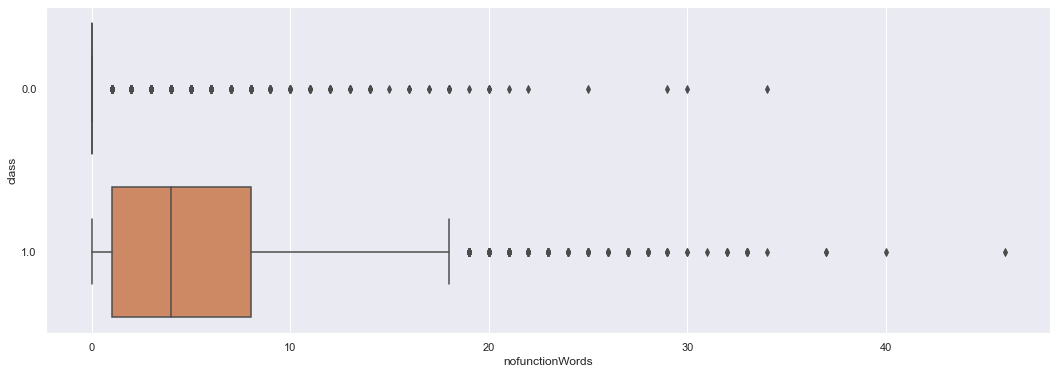

In [808]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "nofunctionWords", y = "class", data = df, orient = "h")

# continuing data pre-processing

### Removing links

In [809]:
def remove_hyperlink(text):
    message = re.sub(r"(www|http)\S+", "", str(text)) 
    return message

df['text'] = df['text'].apply(remove_hyperlink)

### Remove email address

In [810]:
def removeEmail(text):
    message = re.sub('[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}','',text)
    message = message.split()
    return " ".join(message)

df['text'] = df['text'].apply(removeEmail)

### Removing Punctuation Marks

In [811]:
def dataClean(text):
    message = re.sub('[^a-zA-Z]',' ', str(text))
    message = message.split()
    return " ".join(message)

df['text'] = df['text'].apply(dataClean)

### Stop-word removal such as “a”, “we”, “the”, “is”, “are” and etc.

In [813]:
STOPWORDS = set(stopwords.words('english'))

def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] = df['text'].apply(stopwords)

### Converting to Lowercase

In [812]:
def lowercase(text):
    message = text.lower()
    return message

df['text'] = df['text'].apply(lowercase)

### Stemming & Lemmatisation

In [814]:
def stemming_lemmatisation(text):
    message = text.split()
    words = [snowball_stemmer.stem(word) for word in message if word not in stop_words]
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in message if not word in  stop_words]
    return " ".join(words)

df["text"] = df["text"].apply(stemming_lemmatisation)

In [286]:
def processData(rawContents):
    cleaned = tokenizeContent(rawContents)
    cleaned = removeStopWordsFromTokenized(cleaned)
    cleaned = performPorterStemmingOnContents(cleaned)    
    cleaned = removePunctuationFromTokenized(cleaned)
    cleaned = convertItemsToLower(cleaned)
    return cleaned

# FEATURE EXTRACTION AND VECTORIZATION

In [846]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD

In [847]:
X = df.drop(["class","word_count","noDistinctWords","length","nofunctionWords"] ,axis=1)

In [848]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],df['class'],test_size=0.2,random_state=60 )

In [849]:
def features_transform(mail_text):
    transformer = CountVectorizer(max_features=2000).fit(X_train)
    bag_of_words = transformer.transform(mail_text)
     
    tfidf_transformer = TfidfTransformer().fit(bag_of_words)
    tfidf_texts = tfidf_transformer.transform(bag_of_words)
    
    return tfidf_texts

In [850]:
cv=CountVectorizer(max_features=2000).fit(X_train)

In [851]:
X_train_features=features_transform(X_train)
X_test_features=features_transform(X_test)

In [852]:
X_train_features

<10804x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 551220 stored elements in Compressed Sparse Row format>

In [853]:
svd     = TruncatedSVD(n_components=100, random_state=2022)
X_train_features = svd.fit_transform(X_train_features)
X_test_features = svd.fit_transform(X_test_features)

In [854]:
X_train_features

array([[ 0.2103938 , -0.23454252,  0.0750878 , ...,  0.02360682,
        -0.00858267, -0.07538684],
       [ 0.02400482, -0.01556206,  0.02876271, ...,  0.0404442 ,
        -0.00981743,  0.04118819],
       [ 0.03463329, -0.01754671,  0.05075046, ...,  0.0105548 ,
        -0.00059477, -0.00953963],
       ...,
       [ 0.43682856,  0.28972194,  0.01274182, ..., -0.03669953,
        -0.01395317,  0.01689454],
       [ 0.39522189, -0.40603209, -0.3449998 , ...,  0.01997196,
        -0.0044874 ,  0.01538005],
       [ 0.06434286, -0.02961964,  0.22183435, ...,  0.01029772,
         0.00458351, -0.03432254]])

In [855]:
X_train_features.shape

(10804, 100)

### Creating the train dataset for extracted features

In [856]:
X1 = df.drop(["class","word_count","noDistinctWords","text"] ,axis=1)

In [857]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,df['class'],test_size=0.2,random_state=60)

In [858]:
X_train1

,length,nofunctionWords
3030,218,2
1309,21,0
7849,7,0
12536,249,2
6098,4,0
...,...,...
7478,167,3
1541,38,1
13662,238,0
3479,554,12


In [859]:
X_train1.shape

(10804, 2)

In [860]:
from sklearn import preprocessing

In [861]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X_train1_2 = scaler.fit_transform(X_train1)
X_test1_2 = scaler.fit_transform(X_test1)

In [862]:
X_train1_2

array([[-0.92166727, -0.91304348],
       [-0.99245419, -1.        ],
       [-0.99748473, -1.        ],
       ...,
       [-0.91448078, -1.        ],
       [-0.80093424, -0.47826087],
       [-0.9162774 , -1.        ]])

### Combining two train dataset

In [863]:
X_train_features = nm.hstack((X_train1_2,X_train_features))
X_test_features = nm.hstack((X_test1_2,X_test_features))

In [864]:
X_train_features.shape

(10804, 102)

In [865]:
X_train_features

array([[-9.21667266e-01, -9.13043478e-01,  2.10393804e-01, ...,
         2.36068180e-02, -8.58267346e-03, -7.53868355e-02],
       [-9.92454186e-01, -1.00000000e+00,  2.40048228e-02, ...,
         4.04441977e-02, -9.81743015e-03,  4.11881858e-02],
       [-9.97484729e-01, -1.00000000e+00,  3.46332878e-02, ...,
         1.05548003e-02, -5.94765323e-04, -9.53963096e-03],
       ...,
       [-9.14480776e-01, -1.00000000e+00,  4.36828563e-01, ...,
        -3.66995257e-02, -1.39531746e-02,  1.68945382e-02],
       [-8.00934244e-01, -4.78260870e-01,  3.95221891e-01, ...,
         1.99719583e-02, -4.48740467e-03,  1.53800478e-02],
       [-9.16277398e-01, -1.00000000e+00,  6.43428614e-02, ...,
         1.02977176e-02,  4.58351097e-03, -3.43225437e-02]])

In [866]:
import pickle
pickle.dump(cv, open('transform.pkl', 'wb'))

# MODEL TRAINING

In [867]:
def generate_f1_and_heatmap(model, x, y):
    confusion_m = confusion_matrix(y,model.predict(x))
    sns.heatmap(confusion_m,annot=True,fmt="d")
    ac="{:.4f}".format(f1_score(y,model.predict(x)))
    print('f1_test : ', ac)
    print("Y axis : Actual Value.")
    print("X axis : Predicted Value.")
    return 1

In [868]:
def generate_f1(model, x, y):
    confusion_m = confusion_matrix(y,model.predict(x))
    ac="{:.4f}".format(f1_score(y,model.predict(x)))
    print('f1_train : ', ac)
    return 1

## SVM

f1_train :  0.9695
f1_test :  0.8242
Y axis : Actual Value.
X axis : Predicted Value.


1

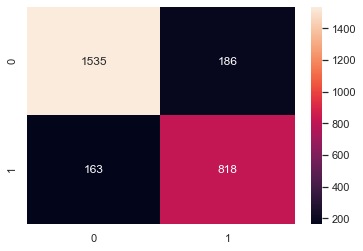

In [869]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

svm_model = SVC()
svm_model.fit(X_train_features,Y_train)


generate_f1(svm_model, X_train_features, Y_train)
generate_f1_and_heatmap(svm_model, X_test_features, Y_test)

## Logistic Regression

f1_train :  0.9537
f1_test :  0.8257
Y axis : Actual Value.
X axis : Predicted Value.


1

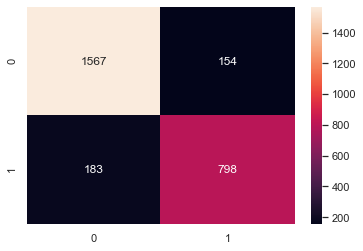

In [870]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(X_train_features,Y_train)


generate_f1(lr_model, X_train_features, Y_train)
generate_f1_and_heatmap(lr_model, X_test_features, Y_test)

## KNN

f1_train :  0.9717
f1_test :  0.8268
Y axis : Actual Value.
X axis : Predicted Value.


1

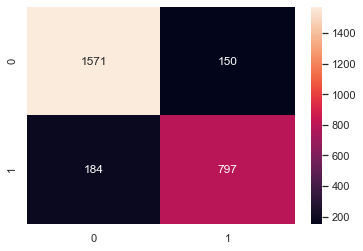

In [871]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_features,Y_train)

generate_f1(knn_model, X_train_features, Y_train)
generate_f1_and_heatmap(knn_model, X_test_features, Y_test)

## Naive Bayes

f1_train :  0.4426
f1_test :  0.6081
Y axis : Actual Value.
X axis : Predicted Value.


1

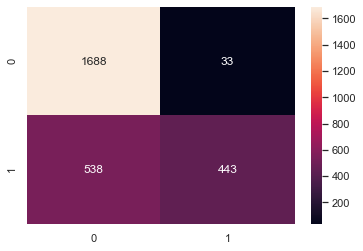

In [872]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

mnb_model = MultinomialNB()
X_train_features1 = MinMaxScaler().fit_transform(X_train_features)
X_test_features1 = MinMaxScaler().fit_transform(X_test_features)
mnb_model.fit(X_train_features1,Y_train)

generate_f1(mnb_model, X_train_features1, Y_train)
generate_f1_and_heatmap(mnb_model, X_test_features1, Y_test)

f1_train :  0.8247
f1_test :  0.8220
Y axis : Actual Value.
X axis : Predicted Value.


1

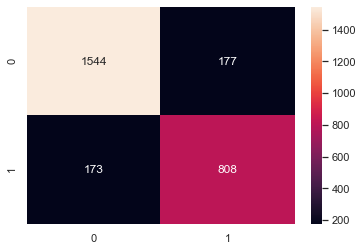

In [873]:
from sklearn.naive_bayes import ComplementNB

cnb_model = ComplementNB()
cnb_model.fit(X_train_features1,Y_train)

generate_f1(cnb_model, X_train_features1, Y_train)
generate_f1_and_heatmap(cnb_model, X_test_features1, Y_test)

## Decision Tree

f1_train :  0.9986
f1_test :  0.6699
Y axis : Actual Value.
X axis : Predicted Value.


1

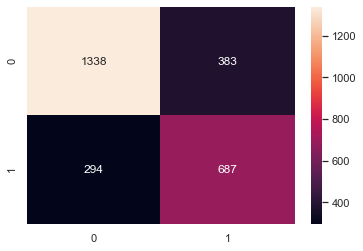

In [874]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features,Y_train)

generate_f1(dt_model, X_train_features, Y_train)
generate_f1_and_heatmap(dt_model, X_test_features, Y_test)

## Random Forest

f1_train :  0.9986
f1_test :  0.8519
Y axis : Actual Value.
X axis : Predicted Value.


1

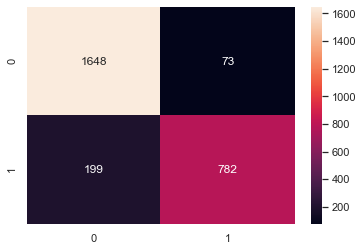

In [876]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_features,Y_train)

generate_f1(rf_model, X_train_features, Y_train)
generate_f1_and_heatmap(rf_model, X_test_features, Y_test)

## Xgboost

f1_train :  0.9985
f1_test :  0.8650
Y axis : Actual Value.
X axis : Predicted Value.


1

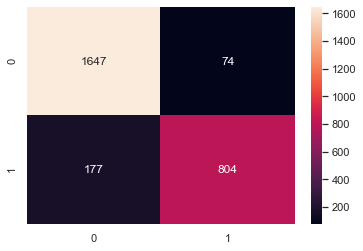

In [877]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_features, Y_train)

generate_f1(xgb_model, X_train_features, Y_train)
generate_f1_and_heatmap(xgb_model, X_test_features, Y_test)

## Light Gradient Boosting Machine

f1_train :  0.9985
f1_test :  0.8792
Y axis : Actual Value.
X axis : Predicted Value.


1

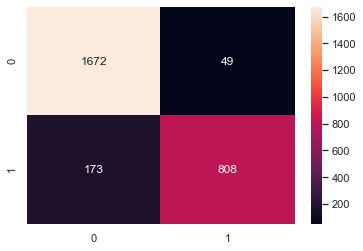

In [878]:
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train_features, Y_train)

generate_f1(lgbm_model, X_train_features, Y_train)
generate_f1_and_heatmap(lgbm_model, X_test_features, Y_test)

# Result Visualisation

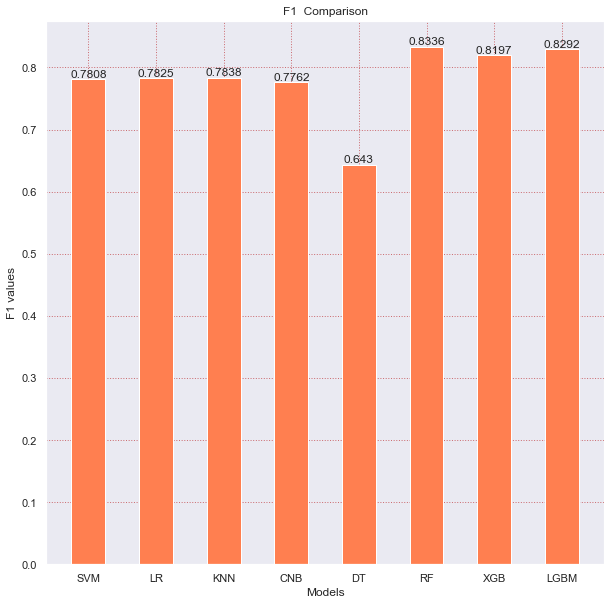

In [767]:
import matplotlib.pyplot as plt

F1_dict = {'SVM':0.7808,'LR':0.7825,'KNN':0.7838,'CNB':0.7762,'DT':0.6430,'RF':0.8336,'XGB':0.8197,'LGBM':0.8292}
models = list(F1_dict.keys())
accuracies = list(F1_dict.values())
fig = plt.figure(figsize = (10, 10))
#  Bar plot
plt.bar(models, accuracies, color ='coral',width = 0.5)
plt.xlabel("Models")
plt.ylabel("F1 values")
plt.title("F1  Comparison")
plt.grid(True,linestyle=':',color='r',alpha=0.8)
for a, b, label in zip(F1_dict.keys(), F1_dict.values(),F1_dict.values()):
    plt.text(a,
             b,
             label,
             ha='center', 
             va='bottom')
plt.show()

## Final Model

f1_train :  0.9985
f1_test :  0.8702
Y axis : Actual Value.
X axis : Predicted Value.


1

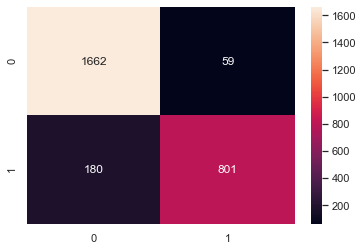

In [879]:
from mlxtend.classifier import StackingCVClassifier

lrclf = LogisticRegression()
scclf = StackingCVClassifier(
    classifiers=[ rf_model, xgb_model, lgbm_model], meta_classifier=lrclf, cv=5)
scclf.fit(X_train_features, Y_train)


generate_f1(scclf, X_train_features, Y_train)
generate_f1_and_heatmap(scclf, X_test_features, Y_test)

# Transforming into Pickle file

In [769]:
import pickle
pickle.dump(scclf,open('SpamEmailDetection.pkl','wb'))